In [1]:
import numpy as np

In [2]:
X = 2*np.random.rand(100,1)

In [3]:
y = 4+3*X+np.random.rand(100,1)

### 회귀계수 추정

In [4]:
# 정규방정식
# b=(X^(T)*X)^(-1)X^(T)*y

In [5]:
X_b=np.c_[np.ones((100,1)),X]

In [6]:
# optimal beta
theta_beta=np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)

In [7]:
theta_beta

array([[4.51872385],
       [2.94979216]])

    추정된 회귀식
    
y=4.51096248+3.00573277*X

### 예측 y= X_new*theta_beta

In [8]:
X_new=np.array([[0],[2]])

In [9]:
X_new_b=np.c_[np.ones((2,1)),X_new]

In [10]:
y_predict=X_new_b.dot(theta_beta)

In [11]:
y_predict

array([[ 4.51872385],
       [10.41830816]])

In [12]:
import matplotlib.pyplot as plt

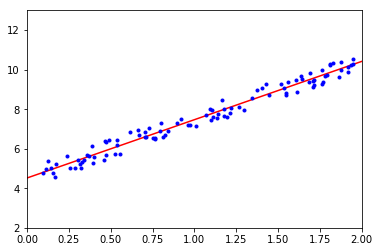

In [13]:
plt.plot(X_new,y_predict,'r-') # 새로운 데이터의 예측값
plt.plot(X,y,'b.')
plt.axis([0,2,2,13])
plt.show()

### sklearn 이용하기

In [14]:
from sklearn.linear_model import LinearRegression
lin_reg=LinearRegression()

In [15]:
lin_reg.fit(X,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [16]:
lin_reg.intercept_

array([4.51872385])

In [17]:
lin_reg.coef_

array([[2.94979216]])

In [18]:
lin_reg.predict(X_new)

array([[ 4.51872385],
       [10.41830816]])

## Gradient descent

In [19]:
eta=0.1 # step size
n_iteration=1000 # interation 수
m=100 # 샘플수

In [20]:
# 데이터 생성
import numpy as np
X = 2*np.random.rand(100,1)
y = 4+3*X+np.random.rand(100,1)
X_b=np.c_[np.ones((100,1)),X]

In [21]:
theta = np.random.randn(2,1) # initialization
# radn: 표준정규분포 가정해서 생성한 난수 2-by-1 벡터

In [22]:
theta

array([[-0.29202339],
       [-0.84092666]])

In [23]:
for iteration in range(n_iteration):
    gradient = 2/m*X_b.T.dot(X_b.dot(theta)-y) # gradient
    theta=theta-eta*gradient # updating theta

In [24]:
theta #GD

array([[4.45754864],
       [3.02473008]])

#### 정규방정식 값
    array([[4.51096248],
           [3.00573277]])

### 확률적 경사하강법

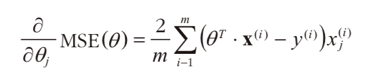

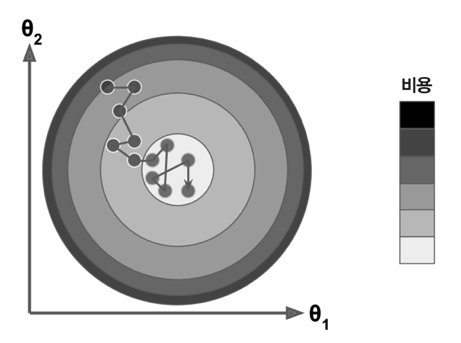

In [44]:
n_epochs=50 # 에폭 수
t0,t1=5,50 

In [45]:
def learning_rate(t): # eta=5/(t+50)
    return t0/(t+t1)

In [46]:
theta=np.random.randn(2,1) # 모수 초기화

In [48]:
theta # 절편=4, 기울기=3

array([[ 0.94957134],
       [-0.01747666]])

In [54]:
for epoch in range(n_epochs): # 50번 반복 SGD
    for i in range(m): # 샘플 수 만큼 반복
        random_index=np.random.randint(m) # 임의의 샘플 선택
        xi=X_b[random_index:random_index+1] # X_b random_index 에 해당하는 샘플을 선택
        yi=y[random_index:random_index+1] # y 벡터에서 random_index 에 해당하는 샘플을 선택
        gradients=2*xi.T.dot(xi.dot(theta)-yi) # gradient 계산
        eta=learning_rate(epoch*m+i) # learning rate update
        theta=theta-eta*gradients # parameter update

In [55]:
theta

array([[4.45636355],
       [3.03132756]])

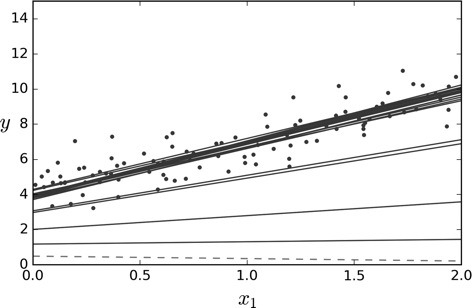

### 미니배치 경사하강법

In [73]:
n_epochs=50 # 에폭 수
t0,t1=5,50 
minibatch_size=20 # 미니 배치사이즈

In [74]:
def learning_rate(t): # eta=5/(t+50)
    return t0/(t+t1)

In [75]:
np.random.permutation(m)

array([22, 41, 17, 64, 27, 47, 31, 44, 30, 33, 95,  9, 25, 13, 24,  7, 79,
       46,  5, 21, 69, 66, 49, 11, 15, 85, 23, 51, 75, 77, 56,  3, 99, 78,
       88, 48, 54, 84, 35, 28, 42,  1, 29, 76, 53, 83,  2, 71, 60, 80,  4,
       39, 40, 74, 26, 38, 50, 63, 67, 96, 58, 34, 91, 45, 61, 82, 81, 62,
       16, 10,  8, 92, 32, 20, 57, 68, 36, 65, 18, 70, 89, 98, 43, 90, 86,
       94, 72,  6, 14, 73, 59, 12, 55, 87, 37, 93,  0, 19, 52, 97])

In [76]:
t=0
for epoch in range(n_epochs): # 50번 반복
    shuffled_indices=np.random.permutation(m) # 데이터를 임의롤 섞음
    X_shuffled=X_b[shuffled_indices] # X_b를 shuffled_indices에 섞음
    y_shuffled=y[shuffled_indices] # y를 shuffled_indices에 섞음
    for i in range(0,m,minibatch_size): #0,20,40,60
        t+=1
        xi=X_shuffled[i:i+minibatch_size]
        yi=y_shuffled[i:i+minibatch_size]
        gradients=2/minibatch_size*xi.T.dot(xi.dot(theta)-yi) # gradient 계산
        eta=learning_rate(t) # learning rate update
        theta=theta-eta*gradients # parameter update

In [77]:
theta

array([[4.4579047 ],
       [3.02509257]])

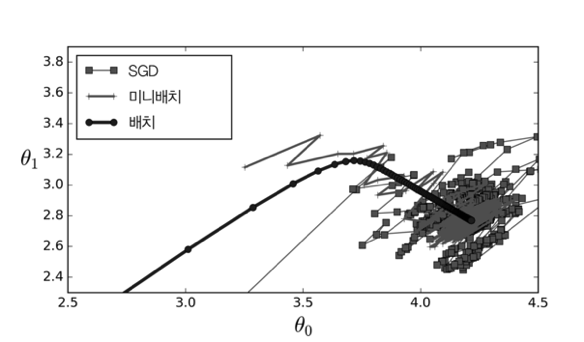

## 다항회귀

- NOTE. 선형회귀모형은 파라미터가 선형인 모델이다!!
- y=beta_0+beta_1*X1+beta_2*X2 는 선형회귀모델인가?

In [11]:
import numpy as np
import numpy.random as rnd

np.random.seed(42)

In [16]:
# 데이터 생성
m=100
X=6*rnd.rand(m,1)-3 #6*(0~1)-3 -> -3~3
y=0.5*X**2+X+2+rnd.randn(m,1) # y=0.5*X^2+X+2+error(0~1)

In [14]:
import matplotlib.pyplot as plt

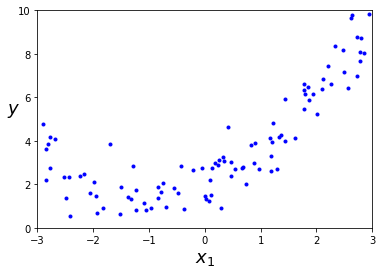

In [15]:
plt.plot(X, y, "b.")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.axis([-3, 3, 0, 10])
#save_fig("quadratic_data_plot")
plt.show()

In [17]:
# 모델 학습 (다항회귀모델)

In [7]:
from sklearn.preprocessing import PolynomialFeatures
poly_features = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly_features.fit_transform(X)
X[0]

array([-0.75275929])

In [18]:
X_poly[0]

array([-0.75275929,  0.56664654])

In [19]:
from sklearn.linear_model import LinearRegression

In [21]:
lin_reg = LinearRegression()
lin_reg.fit(X_poly, y)
lin_reg.intercept_, lin_reg.coef_

(array([3.26369062]), array([[0.07839096, 0.24211388]]))

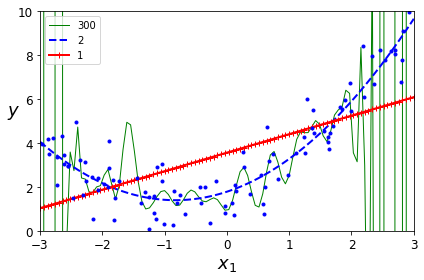

In [22]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

def plot_learning_curves(model, X, y):
    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=10)
    train_errors, val_errors = [], []
    for m in range(1, len(X_train)):
        model.fit(X_train[:m], y_train[:m])
        y_train_predict = model.predict(X_train[:m])
        y_val_predict = model.predict(X_val)
        train_errors.append(mean_squared_error(y_train[:m], y_train_predict))
        val_errors.append(mean_squared_error(y_val, y_val_predict))

    plt.plot(np.sqrt(train_errors), "r-+", linewidth=2, label="train")
    plt.plot(np.sqrt(val_errors), "b-", linewidth=3, label="val")
    plt.legend(loc="upper right", fontsize=14)   # not shown in the book
    plt.xlabel("Training set size", fontsize=14) # not shown
    plt.ylabel("RMSE", fontsize=14)              # not shown

In [23]:
lin_reg=LinearRegression()
plot_learning_curves(lin_reg,X,y)

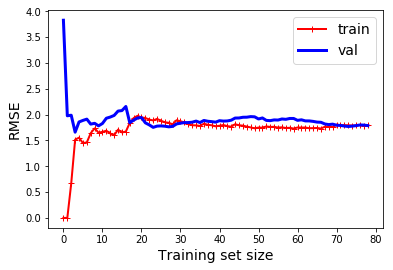

In [24]:
plt.show()

- 과소적합됨(underfitting)
- 모델의 복잡성이 낮다보니 bias가 높게, variance는 낮게 나타남

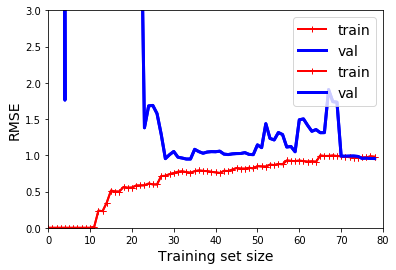

In [26]:
from sklearn.pipeline import Pipeline

polynomial_regression = Pipeline([
        ("poly_features", PolynomialFeatures(degree=10, include_bias=False)),
        ("lin_reg", LinearRegression()),
    ])

plot_learning_curves(polynomial_regression, X, y)
plt.axis([0, 80, 0, 3])           # not shown
#save_fig("learning_curves_plot")  # not shown
plt.show()                        # not shown

- 과적합됨(overfitting)
- validation data와 train data 사이에 초반에 엄청난 갭이 생기는 이유는 과적합이 되었기 때문이고, 이는 데이터 셋이 커지면 줄어들것이다.
    - There is a gap between the curves. This means that the model performs signifi‐
    cantly better on the training data than on the validation data, which is the hall‐
    mark of an overfitting model. However, if you used a much larger training set,
    the two curves would continue to get closer.


편향과 분산 참고자료 : https://bywords.tistory.com/entry/%EB%B2%88%EC%97%AD-%EC%9C%A0%EC%B9%98%EC%9B%90%EC%83%9D%EB%8F%84-%EC%9D%B4%ED%95%B4%ED%95%A0-%EC%88%98-%EC%9E%88%EB%8A%94-biasvariance-tradeoff

## 정규화 

In [12]:
import numpy as np
import numpy.random as rnd
# 데이터 생성
m=100
X=6*rnd.rand(m,1)-3 #6*(0~1)-3 -> -3~3
y=0.5*X**2+X+2+rnd.randn(m,1) # y=0.5*X^2+X+2+error(0~1)

In [13]:
from sklearn.linear_model import Ridge
ridge_reg = Ridge(alpha=1, solver="cholesky")
ridge_reg.fit(X, y)
ridge_reg.predict([[1.5]])

array([[4.94947127]])

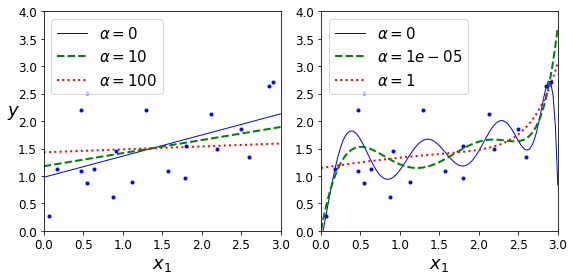

In [14]:
from sklearn.linear_model import SGDRegressor
sgd_reg = SGDRegressor(penalty="l2", max_iter=1000, tol=1e-3, random_state=42)
sgd_reg.fit(X, y.ravel())
sgd_reg.predict([[1.5]])

array([4.90640961])

In [10]:
from sklearn.linear_model import Lasso
lasso_reg = Lasso(alpha=0.1)
lasso_reg.fit(X, y)
lasso_reg.predict([[1.5]])

array([5.00705927])

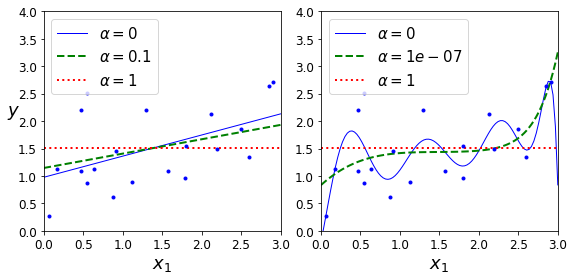

In [15]:
from sklearn.linear_model import ElasticNet
elastic_net = ElasticNet(alpha=0.1, l1_ratio=0.5)
elastic_net.fit(X, y)
elastic_net.predict([[1.5]])

array([4.89197784])

In [16]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

In [17]:
t1a, t1b, t2a, t2b = -1, 3, -1.5, 1.5

t1s = np.linspace(t1a, t1b, 500)
t2s = np.linspace(t2a, t2b, 500)
t1, t2 = np.meshgrid(t1s, t2s)
T = np.c_[t1.ravel(), t2.ravel()]
Xr = np.array([[1, 1], [1, -1], [1, 0.5]])
yr = 2 * Xr[:, :1] + 0.5 * Xr[:, 1:]

J = (1/len(Xr) * np.sum((T.dot(Xr.T) - yr.T)**2, axis=1)).reshape(t1.shape)

N1 = np.linalg.norm(T, ord=1, axis=1).reshape(t1.shape)
N2 = np.linalg.norm(T, ord=2, axis=1).reshape(t1.shape)

t_min_idx = np.unravel_index(np.argmin(J), J.shape)
t1_min, t2_min = t1[t_min_idx], t2[t_min_idx]

t_init = np.array([[0.25], [-1]])

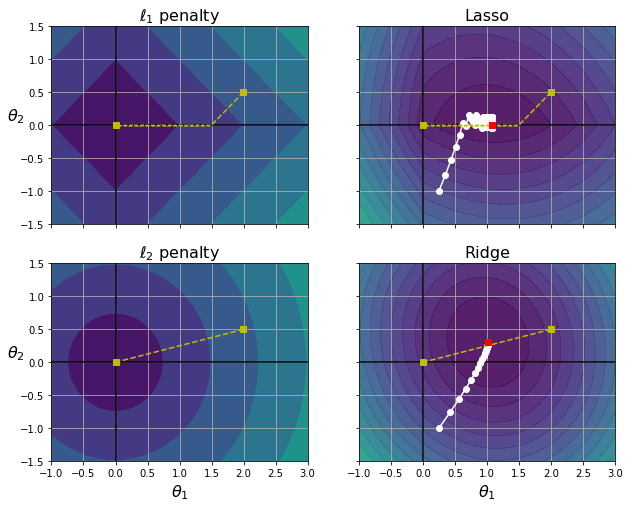

In [18]:
def bgd_path(theta, X, y, l1, l2, core = 1, eta = 0.05, n_iterations = 200):
    path = [theta]
    for iteration in range(n_iterations):
        gradients = core * 2/len(X) * X.T.dot(X.dot(theta) - y) + l1 * np.sign(theta) + l2 * theta
        theta = theta - eta * gradients
        path.append(theta)
    return np.array(path)

fig, axes = plt.subplots(2, 2, sharex=True, sharey=True, figsize=(10.1, 8))
for i, N, l1, l2, title in ((0, N1, 2., 0, "Lasso"), (1, N2, 0,  2., "Ridge")):
    JR = J + l1 * N1 + l2 * 0.5 * N2**2
    
    tr_min_idx = np.unravel_index(np.argmin(JR), JR.shape)
    t1r_min, t2r_min = t1[tr_min_idx], t2[tr_min_idx]

    levelsJ=(np.exp(np.linspace(0, 1, 20)) - 1) * (np.max(J) - np.min(J)) + np.min(J)
    levelsJR=(np.exp(np.linspace(0, 1, 20)) - 1) * (np.max(JR) - np.min(JR)) + np.min(JR)
    levelsN=np.linspace(0, np.max(N), 10)
    
    path_J = bgd_path(t_init, Xr, yr, l1=0, l2=0)
    path_JR = bgd_path(t_init, Xr, yr, l1, l2)
    path_N = bgd_path(np.array([[2.0], [0.5]]), Xr, yr, np.sign(l1)/3, np.sign(l2), core=0)

    ax = axes[i, 0]
    ax.grid(True)
    ax.axhline(y=0, color='k')
    ax.axvline(x=0, color='k')
    ax.contourf(t1, t2, N / 2., levels=levelsN)
    ax.plot(path_N[:, 0], path_N[:, 1], "y--")
    ax.plot(0, 0, "ys")
    ax.plot(t1_min, t2_min, "ys")
    ax.set_title(r"$\ell_{}$ penalty".format(i + 1), fontsize=16)
    ax.axis([t1a, t1b, t2a, t2b])
    if i == 1:
        ax.set_xlabel(r"$\theta_1$", fontsize=16)
    ax.set_ylabel(r"$\theta_2$", fontsize=16, rotation=0)

    ax = axes[i, 1]
    ax.grid(True)
    ax.axhline(y=0, color='k')
    ax.axvline(x=0, color='k')
    ax.contourf(t1, t2, JR, levels=levelsJR, alpha=0.9)
    ax.plot(path_JR[:, 0], path_JR[:, 1], "w-o")
    ax.plot(path_N[:, 0], path_N[:, 1], "y--")
    ax.plot(0, 0, "ys")
    ax.plot(t1_min, t2_min, "ys")
    ax.plot(t1r_min, t2r_min, "rs")
    ax.set_title(title, fontsize=16)
    ax.axis([t1a, t1b, t2a, t2b])
    if i == 1:
        ax.set_xlabel(r"$\theta_1$", fontsize=16)


## 로지스틱 회귀분석

### iris 데이터셋
데이터설명 : 아이리스(붓꽃) 데이터에 대한 데이터이다. 꽃잎의 각 부분의 너비와 길이등을 측정한 데이터이며 150개의 레코드로 구성되어 있다. 아이리스 꽃은 아래의 그림과 같다. 프랑스의 국화라고 한다.

필드의 이해 :
- 데이터의 이해를 돕기 위해 포함된 6개의 변수에 대하여 간략하게 설명한다.  
- 총 6개의 필드로 구성되어있다. caseno는 단지 순서를 표시하므로 분석에서 당연히 제외한다.
- 2번째부터 5번째의 4개의 필드는 입력 변수로 사용되고, 맨 아래의 Species 속성이 목표(종속) 변수로 사용된다.
- Sepal Length	꽃받침의 길이 정보이다.
- Sepal Width	꽃받침의 너비 정보이다.
- Petal Length	꽃잎의 길이 정보이다.
- Petal Width	꽃잎의 너비 정보이다.  
- Species	꽃의 종류 정보이다.  setosa / versicolor / virginica 의 3종류로 구분된다.

출처: https://ai-times.tistory.com/418 [ai-times]
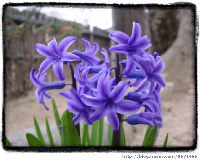

In [1]:
import numpy as np

from sklearn import datasets
iris = datasets.load_iris()
list(iris.keys())

['data',
 'target',
 'frame',
 'target_names',
 'DESCR',
 'feature_names',
 'filename']

In [4]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [2]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [3]:
iris.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [3]:
print(iris.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [9]:
X=iris['data'][:,3:] # 꽃잎의 너비
# iris.data

In [10]:
y=(iris['target']==2).astype(np.int)

In [11]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [12]:
# 로지스틱 회귀분석 
from sklearn.linear_model import LogisticRegression

log_reg=LogisticRegression()
#log_reg.fit(X,y)

In [13]:
log_reg.fit(X,y)

/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [14]:
# prediction

In [15]:
X_new=np.linspace(0,3,1000).reshape(-1,1) #0~3사이에 1000개 샘플 생성후 (1000,1) 행렬로 변환

In [18]:
y_proba=log_reg.predict_proba(X_new) # 1000 observations.. -> 1000 probabilities..

In [21]:
y_proba

array([[0.98554411, 0.01445589],
       [0.98543168, 0.01456832],
       [0.98531838, 0.01468162],
       ...,
       [0.02618938, 0.97381062],
       [0.02598963, 0.97401037],
       [0.02579136, 0.97420864]])

In [19]:
import matplotlib.pyplot as plt

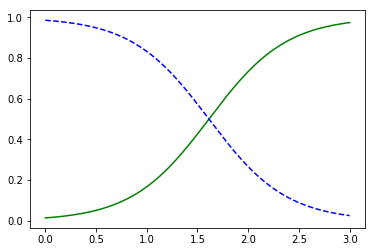

In [22]:
plt.plot(X_new,y_proba[:,1],'g-',label='Iris-Virginica')
plt.plot(X_new,y_proba[:,0],'b--',label='Iris-Virginica 아님')
plt.show()

로지스틱 회귀분석에서 dicision boundary는 0.5이기 때문에 0.5이상이면 y=1, 이하면 1=0이다.

In [23]:
decision_boundary = X_new[y_proba[:, 1] >= 0.5][0]

In [24]:
decision_boundary

array([1.61561562])

In [25]:
log_reg.predict([[1.7], [1.5]])

array([1, 0])

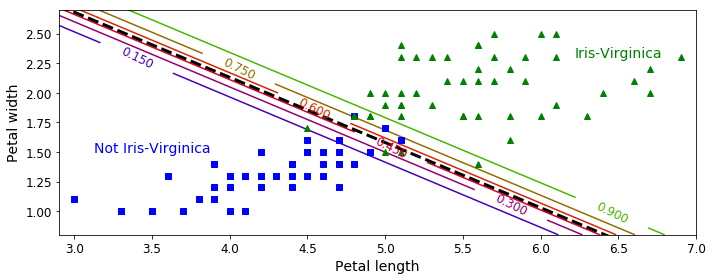

- decision boundary를 기준으로 ax+b<0(=p<0.5), ax+b>0(=p>0.5)이다. 
- decision boundary = ax+b

In [26]:
LogisticRegression(C=1)

LogisticRegression(C=1, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

# multiclass logistic regression

In [28]:
X=iris.data[:,(2,3)]

In [30]:
y=iris.target

In [36]:
softmax_reg=LogisticRegression(multi_class='multinomial',solver='lbfgs',C=10)

In [38]:
softmax_reg.fit(X,y)

LogisticRegression(C=10, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='multinomial',
          n_jobs=None, penalty='l2', random_state=None, solver='lbfgs',
          tol=0.0001, verbose=0, warm_start=False)

In [39]:
softmax_reg.predict([[5,2]])

array([2])

In [40]:
softmax_reg.predict_proba([[5,2]])

array([[6.38014896e-07, 5.74929995e-02, 9.42506362e-01]])

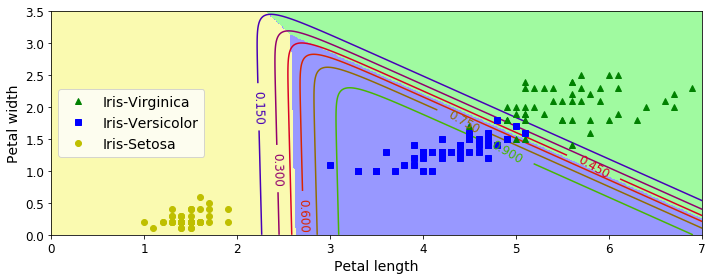